In [1]:
import json 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

import string
# import nltk
from nltk import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D , Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder


from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks

In [2]:
with open("../data/Intent.json") as train_file:
    df= json.load(train_file)

# TOKENIZATION

In [3]:
df["intents"][0]["intent"]

'Greeting'

In [4]:
tags = []
inputs = []
responses = {}

for intent in df['intents']:
    responses[intent['intent']] = intent['responses']
    for lines in intent['text']:
        inputs.append(lines)
        tags.append(intent['intent'])
df = pd.DataFrame({'inputs': inputs, 'tags': tags})
df

,inputs,tags
0,Hi,Greeting
1,Hi there,Greeting
2,Hola,Greeting
3,Hello,Greeting
4,Hello there,Greeting
...,...,...
138,Can you prove you have a conscious,SelfAware
139,Can you prove you are self-aware please,SelfAware
140,Can you prove you are self aware please,SelfAware
141,Can you prove you have a conscious please,SelfAware


In [5]:
df["inputs"] = df["inputs"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df["inputs"] = df["inputs"].apply(lambda wrd:"".join(wrd))

In [6]:
# Tokenizer les data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df["inputs"])
train = tokenizer.texts_to_sequences(df["inputs"])
tokens = tokenizer.texts_to_sequences(df["inputs"])

In [7]:
# apply padding
x_train = pad_sequences(train)

In [8]:
#encoding the outputs
le = LabelEncoder()
y_train = le.fit_transform(df['tags'])

In [9]:
input_shape = x_train.shape[1]
print(input_shape)

9


In [10]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words :",vocabulary)
output_length = le.classes_.shape[0]
print("output length ", output_length)

number of unique words : 117
output length  22


# RNN

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks

In [12]:
#creating model
model = Sequential()
model.add(Embedding(vocabulary+1,10))
model.add(InputLayer(input_shape=(input_shape,)))
model.add(SimpleRNN(30))
model.add(Dense(output_length, activation="softmax"))

In [13]:
#compile the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [14]:
train = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 8ms/step - loss: 3.0853 - accuracy: 0.0210
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 3.0616 - accuracy: 0.0559
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 3.0403 - accuracy: 0.1329
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 3.0169 - accuracy: 0.2028
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9920 - accuracy: 0.2378
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9645 - accuracy: 0.2657
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9317 - accuracy: 0.2727
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 2.8975 - accuracy: 0.2867
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 2.8531 - accuracy: 0.2867
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 2.8034 - accuracy: 0.3007
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.9510
Epoch 85/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.9580
Epoch 86/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4218 - accuracy: 0.9510
Epoch 87/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4161 - accuracy: 0.9650
Epoch 88/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4050 - accuracy: 0.9580
Epoch 89/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.9510
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3982 - accuracy: 0.9650
Epoch 91/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.9510
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3763 - accuracy: 0.9720
Epoch 93/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3743 - accuracy: 0.9510
Epoch 94/100
5/5 [===============

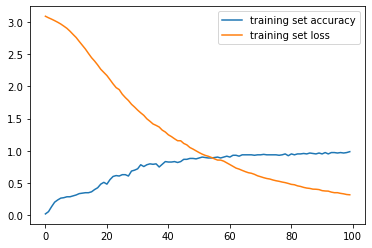

In [15]:
#plotting model accuracy
plt.plot(train.history['accuracy'], label="training set accuracy")
plt.plot(train.history["loss"], label ="training set loss")
plt.legend()

In [16]:
#chatting

import random

while True:
    texts_p = []
    prediction_input = input("You : ")
    
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = "".join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Bot :",random.choice(responses[response_tag]))
    if response_tag == "goodbye" :
        break

KeyboardInterrupt: Interrupted by user

# DELETE OR ADD STOPWORDS

In [16]:
stop_words = stopwords.words("english")

In [17]:
# print(stop_words)
#this will show all the default stop word in the language english

In [18]:
stop_words.append("'s")
stop_words.append("n't")

# stop_words
#this will add or remove a stop word

In [19]:
inputs

['Hi',
 'Hi there',
 'Hola',
 'Hello',
 'Hello there',
 'Hya',
 'Hya there',
 'My user is Adam',
 'This is Adam',
 'I am Adam',
 'It is Adam',
 'My user is Bella',
 'This is Bella',
 'I am Bella',
 'It is Bella',
 'How are you?',
 'Hi how are you?',
 'Hello how are you?',
 'Hola how are you?',
 'How are you doing?',
 'Hope you are doing well?',
 'Hello hope you are doing well?',
 'Good thanks! My user is Adam',
 'Good thanks! This is Adam',
 'Good thanks! I am Adam',
 'Good thanks! It is Adam',
 'Great thanks! My user is Bella',
 'Great thanks! This is Bella',
 'Great thanks! I am Bella',
 'Great thanks! It is Bella',
 'What is my name?',
 'What do you call me?',
 'Who do you think I am?',
 'What do you think I am?',
 'Who are you talking to?',
 'What name do you call me by?',
 'Tell me my name',
 'What is your name?',
 'What could I call you?',
 'What can I call you?',
 'What do your friends call you?',
 'Who are you?',
 'Tell me your name?',
 'What is your real name?',
 'What is your

In [20]:
from nltk.tokenize import word_tokenize

In [22]:
filtered_sentence = []

for line in inputs:
    filtered_sentence.append([w for w in word_tokenize(line) if not w.lower() in stop_words])

    filtered_sentence = [' '.join(ele) for ele in filtered_sentence]

In [24]:
filtered_sentence

['Hi',
 'Hi',
 'Hola',
 'Hello',
 'Hello',
 'Hya',
 'Hya',
 'user Adam',
 'Adam',
 'Adam',
 'Adam',
 'user Bella',
 'Bella',
 'Bella',
 'Bella',
 '?',
 'Hi ?',
 'Hello ?',
 'Hola ?',
 '?',
 'Hope well ?',
 'Hello hope well ?',
 'Good thanks ! user Adam',
 'Good thanks ! Adam',
 'Good thanks ! Adam',
 'Good thanks ! Adam',
 'Great thanks ! user Bella',
 'Great thanks ! Bella',
 'Great thanks ! Bella',
 'Great thanks ! Bella',
 'name ?',
 'call ?',
 'think ?',
 'think ?',
 'talking ?',
 'name call ?',
 'Tell name',
 'name ?',
 'could call ?',
 'call ?',
 'friends call ?',
 '?',
 'Tell name ?',
 'real name ?',
 'real name please ?',
 'real name ?',
 'Tell real name ?',
 'real name ?',
 'real name please ?',
 'real name please ?',
 'time ?',
 'time ?',
 'know time ?',
 'know time ?',
 'tell time ?',
 'Tell time ?',
 'Time',
 'OK thank',
 'OK thanks',
 'OK',
 'Thanks',
 'Thank',
 'helpful',
 'talking',
 'talking',
 'talking',
 '',
 'meant',
 'communicating',
 'speaking',
 'understand saying

In [25]:
df_sw = pd.DataFrame({'inputs': filtered_sentence, 'tags': tags})
df_sw

,inputs,tags
0,Hi,Greeting
1,Hi,Greeting
2,Hola,Greeting
3,Hello,Greeting
4,Hello,Greeting
...,...,...
138,prove conscious,SelfAware
139,prove self-aware please,SelfAware
140,prove self aware please,SelfAware
141,prove conscious please,SelfAware


In [28]:
#duplicates
df_sw.drop_duplicates(inplace=True)

#####  la suite c'est la même

In [29]:
df = df_sw.copy()

In [30]:
df["inputs"] = df["inputs"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df["inputs"] = df["inputs"].apply(lambda wrd:"".join(wrd))

In [31]:
# Tokenizer les data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df["inputs"])
train = tokenizer.texts_to_sequences(df["inputs"])

In [32]:
# apply padding
x_train = pad_sequences(train)

In [48]:
#encoding the outputs
le = LabelEncoder()
Y_train = le.fit_transform(df['tags'])

In [34]:
input_shape = x_train.shape[1]
print(input_shape)

5


In [50]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x_train, Y_train, test_size=0.3, random_state=42, stratify=Y_train)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79, 5)
(34, 5)
(79,)
(34,)


In [35]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words :",vocabulary)
output_length = le.classes_.shape[0]
print("output length ", output_length)

number of unique words : 77
output length  22


In [59]:
vocabulary

77

# RNN

In [36]:
#creating model
model_sw = Sequential()
model_sw.add(Embedding(vocabulary+1,10))
model_sw.add(InputLayer(input_shape=(input_shape,)))
model_sw.add(SimpleRNN(30))
model_sw.add(Dense(output_length, activation="softmax"))

In [37]:
#compile the model
model_sw.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [67]:
early_stopping = callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

In [68]:
early_stop = callbacks.EarlyStopping(monitor="loss",mode="min",verbose=1,patience=100)

In [69]:
# history = model_sw.fit(x_train, Y_train, epochs=100)
history = model_sw.fit(X_train,y_train, epochs=100, validation_split=0.3,callbacks=[early_stopping])
# pas de batch_size ?!

Epoch 1/100
2/2 [==============================] - 0s 66ms/step - loss: 0.2715 - accuracy: 0.9273 - val_loss: 0.1083 - val_accuracy: 0.9583
Epoch 2/100
2/2 [==============================] - 0s 37ms/step - loss: 0.2682 - accuracy: 0.9273 - val_loss: 0.1100 - val_accuracy: 0.9583
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 0.2644 - accuracy: 0.9273 - val_loss: 0.1120 - val_accuracy: 0.9583
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.2595 - accuracy: 0.9273 - val_loss: 0.1149 - val_accuracy: 0.9583
Epoch 5/100
2/2 [==============================] - 0s 38ms/step - loss: 0.2555 - accuracy: 0.9273 - val_loss: 0.1182 - val_accuracy: 0.9583
Epoch 6/100
2/2 [==============================] - 0s 33ms/step - loss: 0.2539 - accuracy: 0.9091 - val_loss: 0.1217 - val_accuracy: 0.9583
Epoch 7/100
2/2 [==============================] - 0s 36ms/step - loss: 0.2497 - accuracy: 0.9091 - val_loss: 0.1237 - val_accuracy: 0.9583
Epoch 8/100
2/2 [===

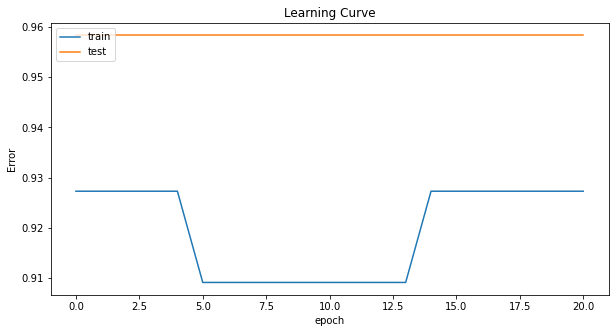

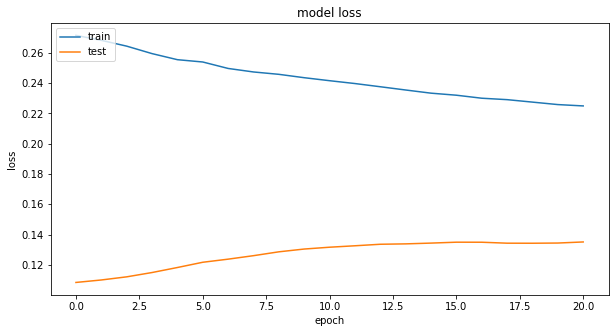

In [70]:
# #plotting model accuracy
# plt.plot(train_sw.history['accuracy'], label="training set accuracy")
# plt.plot(train_sw.history["loss"], label ="training set loss")
# plt.legend()

plt.figure(figsize=(10,5))

# summarize history for mae
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Learning Curve')
plt.ylabel('Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
while True:
    texts_p = []
    prediction_input = input("You : ")
    
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = "".join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    #getting output from model
    output = model_sw.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Bot :",random.choice(responses[response_tag]))
    if response_tag == "goodbye" :
        break

You : Hello
Bot : Hello, I am great, how are you? Please tell me your GeniSys user
You : Marianne
Bot : It is classified, I could tell you but I would have to kill you!
You : Why
Bot : System says no!
You : What do you want
Bot : Let me see
You : I'm awaiting your answer
Bot : It's life Jim but not as we know it!
You : What is your favorite color?
Bot : It's life Jim but not as we know it!
You : Can you prove you have a conscious
Bot : That is an interesting question, can you prove that you are?


KeyboardInterrupt: Interrupted by user

# STEMMING

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
stemmers = PorterStemmer()
input_str = "i don't know what i am doing please help"
input_str = nltk.word_tokenize(input_str)
for word in input_str :
    print(stemmers.stem(word))

# LEMMATIZATION

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
input_str = "so is it the same than stemming"
input_str = nltk.word_tokenize(input_str)
for word in input_str :
    print(lemmatizer.lemmatize(word))

In [ ]:
for index,row in data.iterrows():
    filter_sentence = []
    sentence = row["Title"]